In [43]:
using ReachabilityAnalysis, Plots, Optim

@taylorize function vanderpol!(dx, x, params, t)
    local μ = 1.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1260


In [3]:
X0 = Hyperrectangle(low=[1.25, 2.35], high=[1.55, 2.45])
prob = @ivp(x' = vanderpol!(x), dim=2, x(0) ∈ X0)
sol = solve(prob, T=7.0, alg=TMJets());

In [4]:
solz = overapproximate(sol, Zonotope);

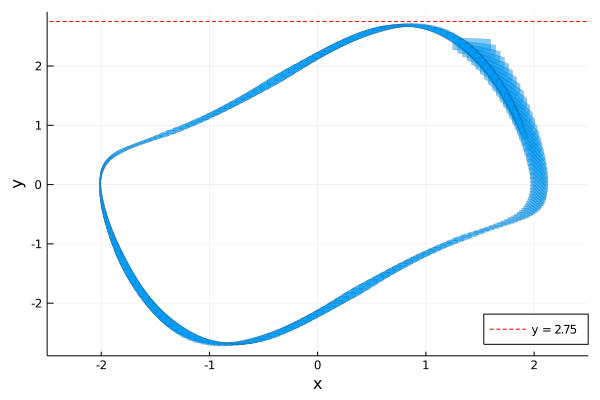

In [12]:
plot(solz, vars=(1, 2), lw=0.2, xlims=(-2.5, 2.5), xlab="x", ylab="y")
plot!(x -> 2.75, color=:red, lab="y = 2.75", style=:dash, legend=:bottomright)

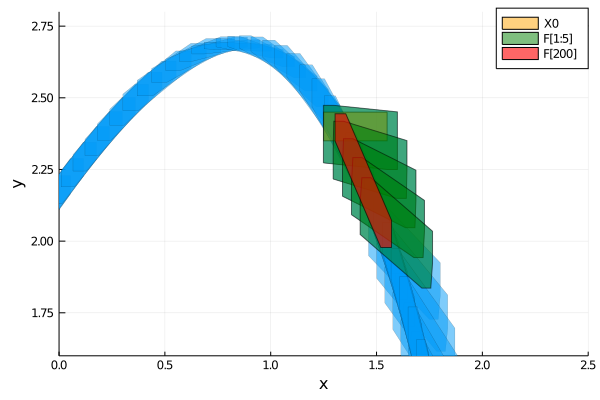

In [21]:
plot(solz, vars=(1, 2), lw=0.2, xlims=(0.0, 2.5), ylims=(1.6, 2.8), xlab="x", ylab="y")
plot!(X0, color=:orange, lab="X0")
plot!(solz[1:5], vars=(1, 2), color=:green, lw=1.0, alpha=0.5, lab="F[1:5]")
plot!(solz[200], vars=(1, 2), color=:red, lw=1.0, alpha=0.6, lab="F[200]")
plot!(Line2D([1, 2.], [2.5, 2.75]))

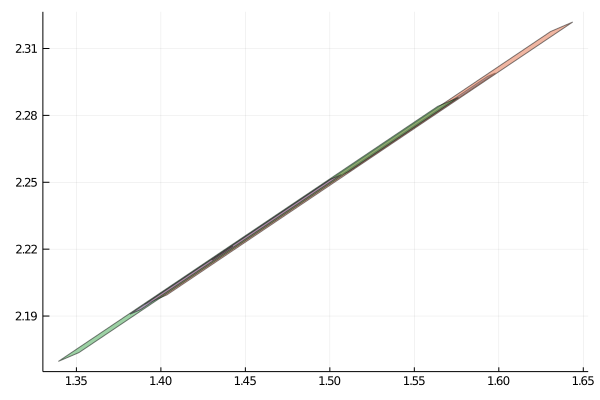

In [44]:
line = Line2D([1, 2.], [2.5, 2.75])
plot(map(x -> Intersection(line, x), set.(solz[1:5])))

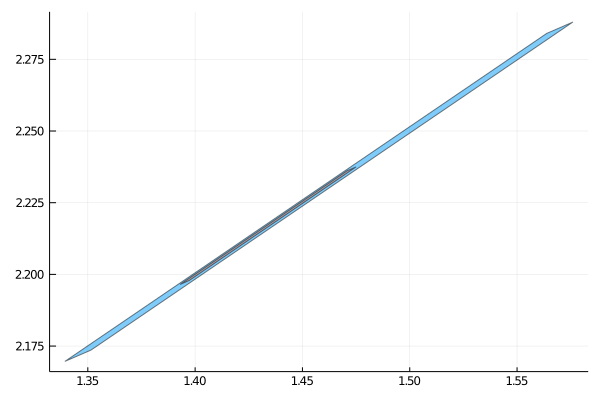

In [56]:
plot(Intersection(line, set(solz[3])))
plot!(Intersection(line, set(solz[200])))